Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Google Drive monté et librairies installées avec succès !

📂 TRAIN SET :
 - Deglet Nour dryer             0 images
 - Deglet Nour oily              0 images
 - Deglet Nour oily treated      0 images
 - Deglet Nour semi-dryer        0 images
 - Deglet Nour semi-dryer treated    90 images
 - Deglet Nour semi-oily         0 images
 - Deglet Nour semi-oily treated     0 images
 - alig                        326 images
 - bessra                        0 images
 - kenta                         0 images
 - kintichi                      0 images

📂 VALIDATION SET :
 - Deglet Nour dryer            66 images
 - Deglet Nour oily             65 images
 - Deglet Nour oily treated     74 images
 - Deglet Nour semi-dryer       65 images
 - Deglet Nour semi-dryer treated    63 images
 - Deglet Nour semi-oily        66 images
 - Deglet Nour semi-oily treated    77 images
 -

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide_1 (TrueDivide)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract_1 (Subtract)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │        14,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,272,075 (8.67 MB)

 Trainable params: 14,091 (55.04 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

✅ Modèle MobileNetV2 construit et compilé avec succès !
Epoch 1/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3376 - loss: 2.0178

13/13 ━━━━━━━━━━━━━━━━━━━━ 119s 9s/step - accuracy: 0.3541 - loss: 1.9583 - val_accuracy: 0.1396 - val_loss: 5.2917
Epoch 2/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8076 - loss: 0.4574

13/13 ━━━━━━━━━━━━━━━━━━━━ 63s 5s/step - accuracy: 0.8097 - loss: 0.4521 - val_accuracy: 0.1911 - val_loss: 6.9034
Epoch 3/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 55s 4s/step - accuracy: 0.8598 - loss: 0.2986 - val_accuracy: 0.1897 - val_loss: 7.2318
Epoch 4/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9395 - loss: 0.1736

13/13 ━━━━━━━━━━━━━━━━━━━━ 56s 5s/step - accuracy: 0.9404 - loss: 0.1725 - val_accuracy: 0.1938 - val_loss: 7.4460
Epoch 5/12
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9130 - loss: 0.1910

13/13 ━━━━━━━━━━━━━━━━━━━━ 63s 5s/step - accuracy: 0.9137 - loss: 0.1907 - val_accuracy: 0.1951 - val_loss: 7.5534
✅ Entraînement terminé avec succès !


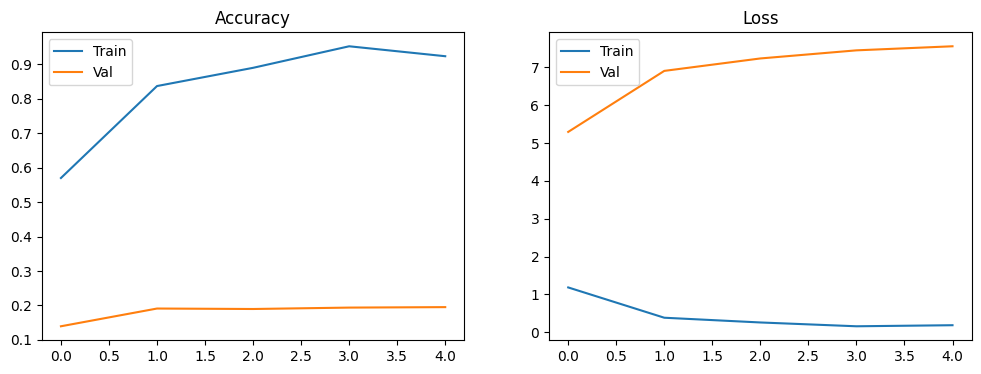

24/24 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step

📋 Rapport de classification :

                                precision    recall  f1-score   support

             Deglet Nour dryer       0.00      0.00      0.00        66
              Deglet Nour oily       0.00      0.00      0.00        65
      Deglet Nour oily treated       0.00      0.00      0.00        74
        Deglet Nour semi-dryer       0.00      0.00      0.00        65
Deglet Nour semi-dryer treated       0.09      0.16      0.11        63
         Deglet Nour semi-oily       0.00      0.00      0.00        66
 Deglet Nour semi-oily treated       0.00      0.00      0.00        77
                          alig       0.15      1.00      0.26        93
                        bessra       0.00      0.00      0.00        45
                         kenta       0.00      0.00      0.00        64
                      kintichi       0.00      0.00      0.00        60

                      accuracy                           0.14  

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


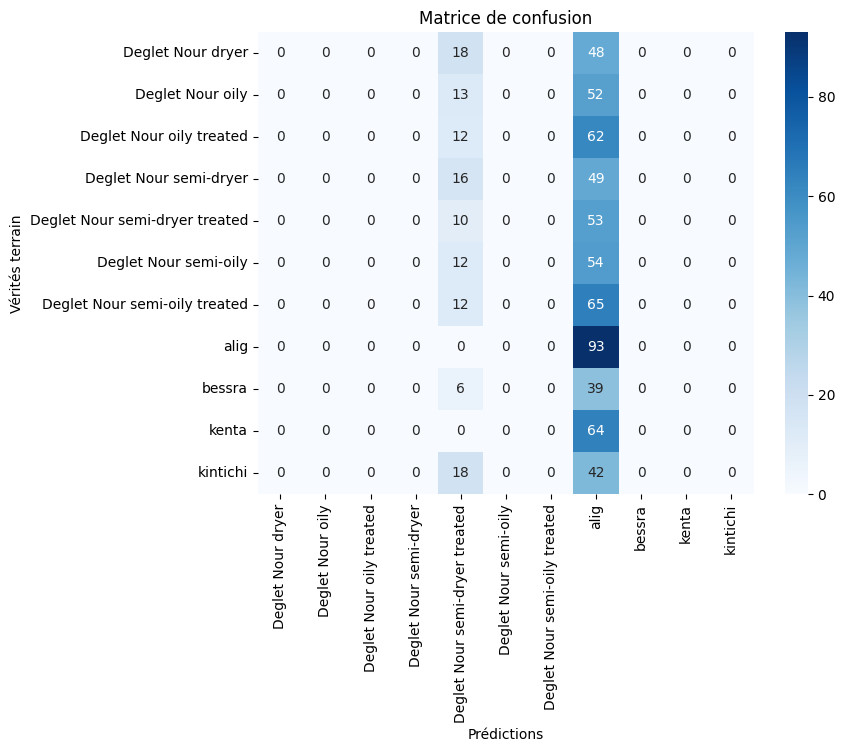

✅ Courbes et matrice générées avec succès !


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
📂 Modèle sauvegardé à l’emplacement : /content/drive/MyDrive/MP_IOT_Hend_Hamdi_M2_MP2L/SmartDate/smartdate_mobilenetv2.h5
📏 Taille du modèle : 9.13 MB
✅ Modèle sauvegardé dans Google Drive avec succès ! 🚀


In [3]:
# ============================================================
# Cellule 0 — Montage de Google Drive et installation librairies
# ============================================================

# Monte mon Drive pour accéder à ma dataset
from google.colab import drive
drive.mount('/content/drive')

# Installer les bibliothèques nécessaires
!pip install -q tensorflow==2.19.0 matplotlib seaborn opencv-python

print("✅ Google Drive monté et librairies installées avec succès !")


# ============================================================
# Cellule 1 — Vérifier la structure du dataset
# ============================================================

import os

# Chemin vers ton dataset dans Google Drive
base = '/content/drive/MyDrive/MP_IOT_Hend_Hamdi_M2_MP2L/SmartDate/Date_Dataset'

# Les sous-dossiers attendus
splits = ['Train', 'Validation', 'Test']

# Boucle sur chaque sous-dossier
for split in splits:
    split_path = os.path.join(base, split)
    print(f"\n📂 {split.upper()} SET :")

    # Parcourt les classes dans chaque dossier
    for d in sorted(os.listdir(split_path)):
        path = os.path.join(split_path, d)
        if os.path.isdir(path):
            nb_images = len([f for f in os.listdir(path) if f.lower().endswith(('.jpg', '.png'))])
            print(f" - {d:<25} {nb_images:>5} images")

print("\n✅ Structure du dataset vérifiée avec succès !")

# ============================================================
# Cellule 2 — Chargement du dataset dans TensorFlow
# ============================================================

import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Paramètres de base
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Définir les chemins complets
train_dir = f"{base}/Train"
val_dir = f"{base}/Validation"
test_dir = f"{base}/Test"

# Chargement des ensembles
train_ds = image_dataset_from_directory(train_dir, image_size=IMG_SIZE, batch_size=BATCH_SIZE, shuffle=True)
val_ds = image_dataset_from_directory(val_dir, image_size=IMG_SIZE, batch_size=BATCH_SIZE, shuffle=False)
test_ds = image_dataset_from_directory(test_dir, image_size=IMG_SIZE, batch_size=BATCH_SIZE, shuffle=False)

# Afficher les classes détectées
class_names = train_ds.class_names
print("📚 Classes détectées :", class_names)
print("✅ Dataset chargé avec succès depuis Google Drive !")


# ============================================================
# Cellule 3 — Data Augmentation et Préparation
# ============================================================

from tensorflow.keras import layers

AUTOTUNE = tf.data.AUTOTUNE

# Optimiser le pipeline pour accélérer l'entraînement
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Création du pipeline d’augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.12),
    layers.RandomZoom(0.12),
    layers.RandomContrast(0.1),
], name='data_augmentation')

print("✅ Data augmentation configurée et pipeline optimisé !")


# ============================================================
# Cellule 4 — Construction du modèle MobileNetV2
# ============================================================

from tensorflow import keras

# Charger le modèle pré-entraîné MobileNetV2 sans la tête de classification
base_model = tf.keras.applications.MobileNetV2(
    input_shape=IMG_SIZE + (3,),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Geler les poids

# Construire le modèle complet
inputs = keras.Input(shape=IMG_SIZE + (3,))
x = data_augmentation(inputs)
x = tf.keras.applications.mobilenet_v2.preprocess_input(x)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(len(class_names), activation='softmax')(x)

model = keras.Model(inputs, outputs)

# Compiler le modèle
model.compile(optimizer=keras.optimizers.Adam(1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
print("✅ Modèle MobileNetV2 construit et compilé avec succès !")


# ============================================================
# Cellule 5 — Entraînement du modèle avec callbacks
# ============================================================

callbacks = [
    keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_accuracy'),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
]

EPOCHS = 12

history = model.fit(train_ds, validation_data=val_ds, epochs=EPOCHS, callbacks=callbacks)
print("✅ Entraînement terminé avec succès !")


# ============================================================
# Cellule 6 — Courbes + Matrice de confusion
# ============================================================

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# --- Courbes d'entraînement ---
acc = history.history['accuracy']; val_acc = history.history['val_accuracy']
loss = history.history['loss']; val_loss = history.history['val_loss']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1); plt.plot(acc, label='Train'); plt.plot(val_acc, label='Val'); plt.legend(); plt.title('Accuracy')
plt.subplot(1, 2, 2); plt.plot(loss, label='Train'); plt.plot(val_loss, label='Val'); plt.legend(); plt.title('Loss')
plt.show()

# --- Matrice de confusion ---
val_images, val_labels = [], []
for imgs, labels in val_ds.unbatch():
    val_images.append(imgs.numpy()); val_labels.append(int(labels.numpy()))

val_images = np.array(val_images)
val_labels = np.array(val_labels)
preds = model.predict(val_images, verbose=1)
pred_labels = np.argmax(preds, axis=1)

print("\n📋 Rapport de classification :\n")
print(classification_report(val_labels, pred_labels, target_names=class_names))

cm = confusion_matrix(val_labels, pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vérités terrain")
plt.show()

print("✅ Courbes et matrice générées avec succès !")


# ============================================================
# Cellule 7 — Sauvegarde du modèle final dans Google Drive
# ============================================================

# Monter Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Le chemin de sauvegarde dans mon Drive
save_path = '/content/drive/MyDrive/MP_IOT_Hend_Hamdi_M2_MP2L/SmartDate/smartdate_mobilenetv2.h5'

# Sauvegarder le modèle entraîné
model.save(save_path)

# Vérification du fichier sauvegardé
import os
if os.path.exists(save_path):
    print(f"📂 Modèle sauvegardé à l’emplacement : {save_path}")
    print(f"📏 Taille du modèle : {round(os.path.getsize(save_path) / 1024 / 1024, 2)} MB")
    print("✅ Modèle sauvegardé dans Google Drive avec succès ! 🚀")
else:
    print("❌ Erreur : le modèle n’a pas été trouvé dans le Drive. Vérifie le chemin.")
